In [1]:
!pip install gymnasium matplotlib numpy

In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [3]:
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode='rgb_array')

In [4]:
def q_learning(env, episodes=10000, alpha=0.1, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.01):
    # Инициализация Q-таблицы
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    rewards = []
    epsilons = []

    for episode in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0

        while not done:
            # Выбор действия (epsilon-greedy стратегия)
            if np.random.rand() < epsilon:
                action = env.action_space.sample()  # случайное действие
            else:
                action = np.argmax(q_table[state])  # жадное действие

            # Выполнение действия и получение нового состояния
            next_state, reward, done, _, _ = env.step(action)

            # Обновление Q-таблицы
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

            # Переход к следующему состоянию
            state = next_state
            total_reward += reward

        # Уменьшение epsilon
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        # Сохранение данных для графиков
        rewards.append(total_reward)
        epsilons.append(epsilon)

    return q_table, rewards, epsilons

In [5]:
q_table, rewards, epsilons = q_learning(env)

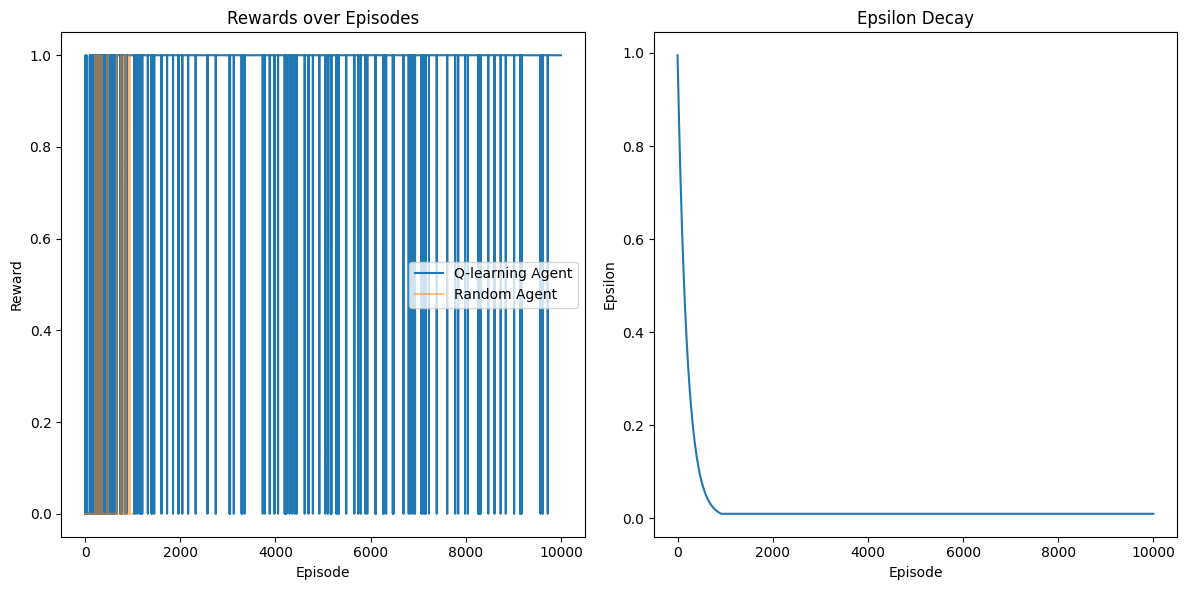

In [6]:
def random_agent(env, episodes=1000):
    rewards = []
    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        total_reward = 0
        while not done:
            action = env.action_space.sample()  # случайное действие
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
    return rewards

# Получаем результаты случайного агента
random_rewards = random_agent(env)

# График обучения
plt.figure(figsize=(12, 6))

# График наград обученного агента
plt.subplot(1, 2, 1)
plt.plot(rewards, label="Q-learning Agent")
plt.plot(random_rewards, label="Random Agent", alpha=0.5)
plt.title("Rewards over Episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.legend()

# График изменения epsilon
plt.subplot(1, 2, 2)
plt.plot(epsilons)
plt.title("Epsilon Decay")
plt.xlabel("Episode")
plt.ylabel("Epsilon")

plt.tight_layout()
plt.show()

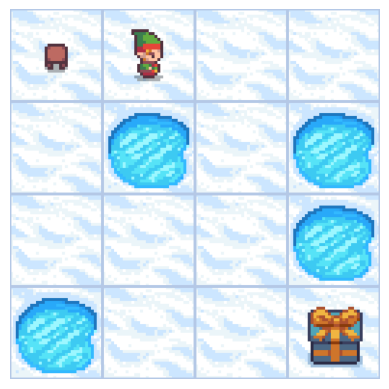

In [7]:
from matplotlib import animation
from IPython.display import HTML

def render_episode(env, q_table):
    frames = []
    state, _ = env.reset()
    done = False

    while not done:
        action = np.argmax(q_table[state])  # Жадное действие
        state, reward, done, _, _ = env.step(action)
        frame = env.render()
        frames.append(frame)

    return frames

frames = render_episode(env, q_table)

# Создание анимации
fig, ax = plt.subplots()
plt.axis('off')

def animate(i):
    ax.imshow(frames[i])

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=500)
HTML(ani.to_jshtml())